In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np




Found 1762 images belonging to 3 classes.


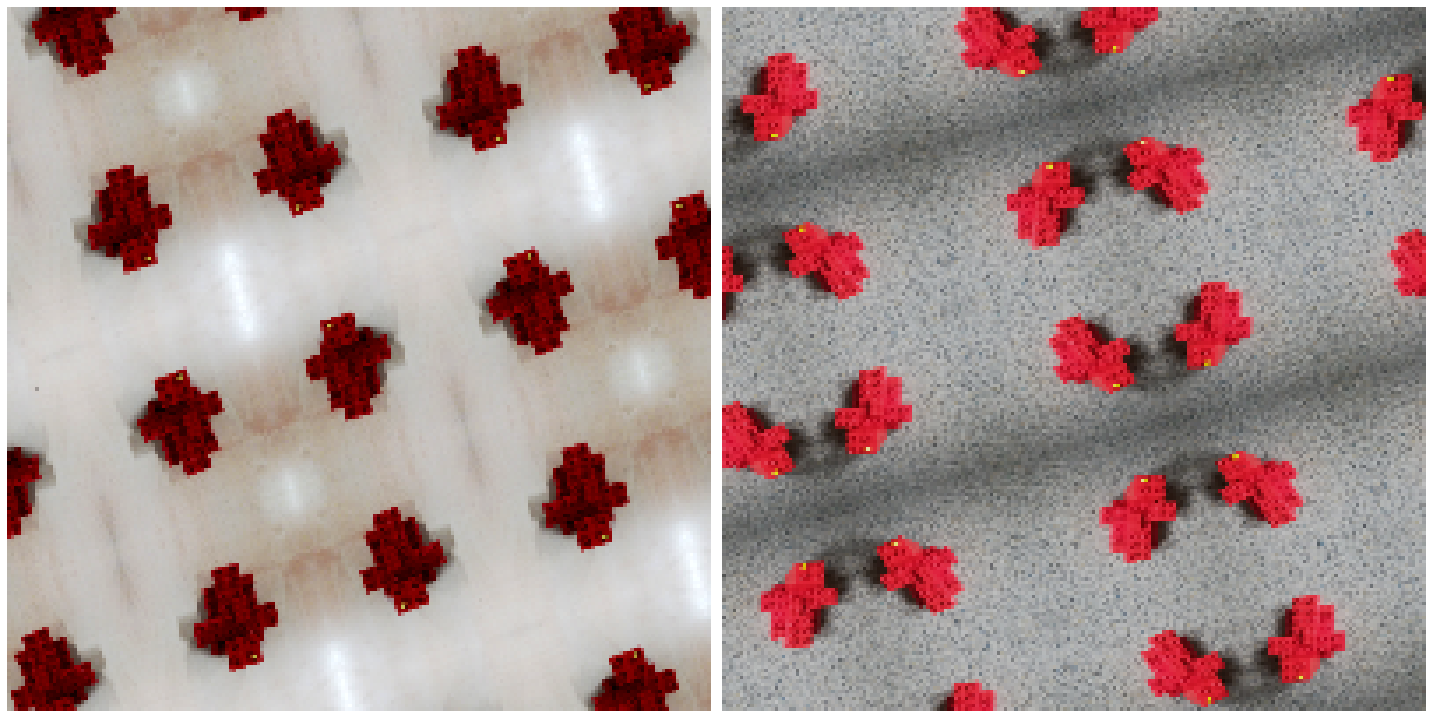

[[0. 0. 1.]
 [0. 0. 1.]]


In [9]:
path = 'D:/Data/BME/felev_5/temalab_tanulas/datasets/error_detection'
IMG_SIZE = 200
savepath = 'D:/Data/BME/felev_5/temalab_tanulas/datasets/'

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
#validation_split = 0.2


train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range= 30, width_shift_range = 0.05, height_shift_range  =0.05,
                        zoom_range = [3,5], brightness_range = [0.8, 1.2],
                        channel_shift_range= 60, horizontal_flip = True, vertical_flip = True, fill_mode = "reflect")


#valid_generator = train_datagen.flow_from_directory(directory=path+'/valid', target_size = (IMG_SIZE,IMG_SIZE), classes = ['1','2','3'], batch_size = 10, subset='validation', color_mode = 'rgb', shuffle = True, save_to_dir=savepath+'augmentedValid', save_format="png", save_prefix = "aug")
train_generator = train_datagen.flow_from_directory(directory=path, target_size = (IMG_SIZE,IMG_SIZE),
                        classes = ['1','2','3'], batch_size = 2, subset='training',
                        color_mode = 'rgb', shuffle = True)
# save_to_dir=savepath+'augmented_fulltrain', save_format="png", save_prefix = "aug"


#batches  = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split = 0.2).flow_from_directory(directory=path, target_size = (100,100), classes = ['1','2','3'], batch_size = 10)

imgs, labels = next(train_generator)
plotImages(imgs)
print(labels)



In [4]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation='relu', padding = 'same', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    MaxPool2D(pool_size=(2,2), strides = 2),
    #Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding = 'same'),
    #MaxPool2D(pool_size=(2,2), strides = 2),
    #Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding = 'same'),
    #MaxPool2D(pool_size=(2,2), strides = 2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 960003    
Total params: 960,899
Trainable params: 960,899
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#model.fit(x = batches, epochs = 10, verbose = 2)
model.fit(train_generator, epochs = 30) #, validation_data = valid_generator

Epoch 1/30
177/177 [==============================] - 621s 4s/step - loss: 1.5129 - accuracy: 0.3842
Epoch 2/30
177/177 [==============================] - 243s 1s/step - loss: 0.9991 - accuracy: 0.4336
Epoch 3/30
177/177 [==============================] - 221s 1s/step - loss: 0.9850 - accuracy: 0.4813
Epoch 4/30
177/177 [==============================] - 234s 1s/step - loss: 1.0009 - accuracy: 0.4824
Epoch 5/30
177/177 [==============================] - 230s 1s/step - loss: 0.9576 - accuracy: 0.4960
Epoch 6/30
177/177 [==============================] - 228s 1s/step - loss: 0.9396 - accuracy: 0.5074
Epoch 7/30
177/177 [==============================] - 220s 1s/step - loss: 0.9283 - accuracy: 0.5267
Epoch 8/30
177/177 [==============================] - 225s 1s/step - loss: 0.9318 - accuracy: 0.5153
Epoch 9/30
177/177 [==============================] - 218s 1s/step - loss: 0.9025 - accuracy: 0.5448
Epoch 10/30
177/177 [==============================] - 221s 1s/step - loss: 0.9080 - accura